<a href="https://colab.research.google.com/github/shyandsy/ModernComputerVisionWithPyTorch/blob/main/chapter2_PyTorch%E5%9F%BA%E7%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: pytorch张量

## 1. 初始化张量, shape, dtype

In [ ]:
import torch
import numpy as np

# 初始化张量
x = torch.tensor([
    [1,2]
])
y = torch.tensor([
    [1],
     [2]
])
print(f'x = {x}')
print(f'x.shape = {x.shape}')
print(f'y = {y}')
print(f'y.shape = {y.shape}')
print(f'x.dtype = {x.dtype}')

x = torch.tensor([False, 0, 2.0])
print(f'[False, 0, 2.0] = {x}')

# 3行4列填充0
print(f'3行4列填充0: {torch.zeros((3,4))}')
# 3行4列填充1
print(f'3行4列填充1: {torch.ones((3,4))}')
# 3行4列随机填充[0,10)
print(f'3行4列填充1: {torch.randint(low=0, high=10, size=(3,4))}')
# 3行4列随机填充[0,1)
print(f'3行4列填充1: {torch.rand((3,4))}')
# 3行4列正态分布填充[0,1)
print(f'3行4列填充1: {torch.randn((3,4))}')

# numpy to pytorch tensor
x = np.array([
    [10, 20, 30],
    [2, 3, 4],
])
y = torch.tensor(x)
print(f'x = {x}')
print(f'y = {y}')
print(f'x.dtype: {x.dtype}')
print(f'y.dtype: {y.dtype}')


x = tensor([[1, 2]])
x.shape = torch.Size([1, 2])
y = tensor([[1],
        [2]])
y.shape = torch.Size([2, 1])
x.dtype = torch.int64
[False, 0, 2.0] = tensor([0., 0., 2.])
3行4列填充0: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
3行4列填充1: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
3行4列填充1: tensor([[7, 1, 0, 6],
        [5, 3, 5, 6],
        [6, 7, 0, 3]])
3行4列填充1: tensor([[0.9841, 0.2100, 0.4480, 0.7866],
        [0.0461, 0.7143, 0.3726, 0.8889],
        [0.9266, 0.1530, 0.0214, 0.2776]])
3行4列填充1: tensor([[-0.0277,  2.1807,  0.5854, -0.3137],
        [ 0.3198, -0.1915,  1.6475, -0.3835],
        [ 1.5440,  0.6145, -0.5033, -1.9865]])
x = [[10 20 30]
 [ 2  3  4]]
y = tensor([[10, 20, 30],
        [ 2,  3,  4]])
x.dtype: int64
y.dtype: torch.int64


## 2. 张量运算

In [ ]:
import torch

x = torch.tensor([
    [1,2,3,4],
    [5,6,7,8]
])

# 矩阵每个元素乘10
print("tensor运算")
print(f'矩阵 x = {x}')
print(f'x每个元素 * 10: {x * 10}')
print(f'x每个元素 + 10: {x + 10}')
print()

# 重塑一个张量: view 改变形状
print("重塑view: 改变形状")
y = torch.tensor([2,3,1,0])
print(f'矩阵 y = {y}, shape = y.shape')
y = y.view(4,1)
print(f'y.view(4,1)之后: \n矩阵 y = {y}, shape = y.shape')
print()

# 重塑一个张量: squeeze, 移除指定轴，适用于要删除的轴只有一个项的场合
print("重塑squeeze: 移除指定轴，适用于要删除的轴只有一个项的场合")
x = torch.rand(3,1,5) # 3*1*5矩阵
z1 = torch.squeeze(x, 1)
z2 = x.squeeze(1)
assert torch.all(z1==z2)
print(f'Squeeze: \n x.shape = {x.shape}, z1.shape = {z1.shape}, z2.shape = {z2.shape}')
print(f'Squeeze: \n x = {x} \nz1 = {z1}, \nz2 = {z2}')
print()

# 重塑一个张量: unsqueeze, 增加一个维度
print("重塑unsqueeze: 增加一个维度")
x = torch.randn(4,3) # 4*3矩阵
print(f'x.shape = {x.shape}')
print(f'x = {x}')
z1 = x.unsqueeze(0)
print(f'z1.shape = {z1.shape}')
print(f'z1 = {z1}')
print()

print("重塑: None索引在指定列增加一个维度")
x = torch.randn(4,3) # 4*3矩阵
print(f'x = {x}')
z2,z3,z4 = x[None], x[:,None], x[:,:,None]
print(f'x[None] = {z2.shape}\nx[None]={z2}')
print(f'x[:None] = {z3.shape}\nx[:None]={z3}')
print(f'x[:,:,None] = {z4.shape}\nx[:,:,None]={z4}')
print()

print("张量的矩阵乘法")
x = torch.tensor([
    [1,2,3,],
    [4,5,6,]
])
y = torch.tensor([
    [1],
    [2],
    [3]
])
print(f'x={x}\ny={y}\nx*y={torch.matmul(x,y)}')
print(f'@实现矩阵乘法 x@y = {x@y}')
print()

print("实现张量连接: torch.cat")
x = torch.randn(1,2,3)
print(f'x={x}')
print(f'x.shape={x.shape}')
z = torch.cat([x, x], axis=0)  # np.concatenate()
print(f'cat axis = 0: z.shape={z.shape}')
print(f'cat axis = 0: z={z}')
z = torch.cat([x, x], axis=1)  # np.concatenate()
print(f'cat axis = 1: z.shape={z.shape}')
print(f'cat axis = 1: z={z}')
z = torch.cat([x, x], axis=2)  # np.concatenate()
print(f'cat axis = 2: z.shape={z.shape}')
print(f'cat axis = 2: z={z}')
print()

print("张量最大值: max (min和max用法相同)")
x = torch.arange(25).reshape(5,5) # [0,25), 5*5矩阵
x = torch.randint(low=0, high=25, size=(5,5)) # [0,25), 5*5矩阵
print(f'x={x}')
print(f'x.shape = {x.shape}')
print(f'max = {x.max()}')
print(f'列最大值的行索引: x.max(dim=0) = {x.max(dim=0)}')
print(f'行最大值的列索引: x.max(dim=1) = {x.max(dim=1)}')
print()

print("置换张量对象的维数")
x = torch.randn(2,3,4)
print(f'x={x}')
print(f'x.shape = {x.shape}')
z = x.permute(2,0,1)
print(f'z={z}')
print(f'z.shape = {z.shape}')
print()

tensor运算
矩阵 x = tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
x每个元素 * 10: tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])
x每个元素 + 10: tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])

重塑view: 改变形状
矩阵 y = tensor([2, 3, 1, 0]), shape = y.shape
y.view(4,1)之后: 
矩阵 y = tensor([[2],
        [3],
        [1],
        [0]]), shape = y.shape

重塑squeeze: 移除指定轴，适用于要删除的轴只有一个项的场合
Squeeze: 
 x.shape = torch.Size([3, 1, 5]), z1.shape = torch.Size([3, 5]), z2.shape = torch.Size([3, 5])
Squeeze: 
 x = tensor([[[0.5411, 0.0845, 0.1221, 0.4586, 0.0399]],

        [[0.0126, 0.9811, 0.8906, 0.6897, 0.2380]],

        [[0.3215, 0.8552, 0.4761, 0.3062, 0.1953]]]) 
z1 = tensor([[0.5411, 0.0845, 0.1221, 0.4586, 0.0399],
        [0.0126, 0.9811, 0.8906, 0.6897, 0.2380],
        [0.3215, 0.8552, 0.4761, 0.3062, 0.1953]]), 
z2 = tensor([[0.5411, 0.0845, 0.1221, 0.4586, 0.0399],
        [0.0126, 0.9811, 0.8906, 0.6897, 0.2380],
        [0.3215, 0.8552, 0.4761, 0.3062, 0.1953]])

重塑unsqueeze: 增加一个维度
x.shape

## 3.自动梯度
定义计算输出方式

$out = \sum_{i=1}^{4}x_i^2$

这个函数的梯度是$2x$

$ x = [ \\
  [2, -1] \\
  [1, 1] \\
] $

则梯度是

$ x = [ \\
  [4, -2] \\
  [2, 2] \\
] $

使用pytorch内置函数来验证，可以通过某个值调用backward()方法计算该值的梯度


In [ ]:
import torch
x = torch.tensor([
    [2., -1.],
    [1., 1.]
], requires_grad=True)
print("自动计算梯度：requires_grad=True")
out = x.pow(2).sum()
out.backward()
print(f'x梯度: {x.grad}')

自动计算梯度：requires_grad=True
x梯度: tensor([[ 4., -2.],
        [ 2.,  2.]])


## 重新实现rule chain


In [ ]:
import numpy as np
import torch
from copy import deepcopy

def feed_forward(inputs, outputs, weights):
  # inputs: (n, 2)
  # weights[0]: (2, 3)
  # pre_hidden: (n, 3)
  pre_hidden = torch.matmul(inputs, weights[0]) + weights[1]

  # s激活
  # hiden: : (n, 3)
  hidden = 1/(1 + torch.exp(-pre_hidden))

  # hiden: : (n, 3)
  # weights[2]: (3,1)
  # weights[3]: (1)
  # pre_out: (n, 1)
  pre_out = torch.matmul(hidden, weights[2]) + weights[3]

  # mse
  mse = torch.mean(torch.square(pre_out - outputs))

  return mse

x = np.array([ [1., -1.] ])
y = np.array([ [0] ])
x, y = [torch.tensor(i).float() for i in [x, y]]

W = [
    # 全连接层2*3权重矩阵
    np.array([
        [-0.0053, 0.3793],
        [-0.5820, 0.5204],
        [-0.2723, 0.1896]
      ], dtype=np.float32).T,
    # 与隐藏层每个节点相关联的偏置项
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[0.1528, -0.1745, -0.1136]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]
W = [torch.tensor(i, requires_grad=True) for i in W]

print(f'===> x = {x}')
print(f'===> y = {y}')
loss = feed_forward(x, y, W)
print(f'loss = {loss}')
loss.backward()
print(f'w grad = {[w.grad for w in W]}')

updated_W = [w-w.grad for w in W]
print(f'updated_W = {updated_W}')

===> x = tensor([[ 1., -1.]])
===> y = tensor([[0.]])
loss = 0.3559781312942505
w grad = [tensor([[-0.0438,  0.0484,  0.0317],
        [ 0.0438, -0.0484, -0.0317]]), tensor([-0.0438,  0.0484,  0.0317]), tensor([[-0.4793],
        [-0.4389],
        [-0.4436]]), tensor([-1.1933])]
updated_W = [tensor([[ 0.0385, -0.6304, -0.3040],
        [ 0.3355,  0.5688,  0.2213]], grad_fn=<SubBackward0>), tensor([ 0.0298,  0.5123, -0.0945], grad_fn=<SubBackward0>), tensor([[0.6321],
        [0.2644],
        [0.3300]], grad_fn=<SubBackward0>), tensor([0.6417], grad_fn=<SubBackward0>)]


## 对比pytorch tensor和numpy ndarray

In [ ]:
import torch
import numpy as np

x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

print("matmul time cost:")
x, y = x.to(device), y.to(device)
%timeit z=(x@y)

x, y = x.cpu(), y.cpu()
print("cpu matmul time cost:")
%timeit z=(x@y)

x, y = x.numpy(), y.numpy()
print("cpu matmul time cost:")
%timeit np.matmul(x,y)


cuda
matmul time cost:
The slowest run took 5.03 times longer than the fastest. This could mean that an intermediate result is being cached.
49.5 µs ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
cpu matmul time cost:
9.18 ms ± 82.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
cpu matmul time cost:
10.5 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 使用pytorch构建神经网络

*   隐藏层的数量
*   隐藏层中的单元数量
*   各个层中的激活函数
*   实现最优化的损失函数
*   与神经网络有关的学习率
*   用于构建神经网络的数据的批大小
*   向前传播和反向传播的轮数

这部分我们将在小数据集上使用pytorch实现所有这些功能

计算公式

$y = xW^T + b$

$W^T$是W的转置矩阵，所以，

1. self.input_to_hidden_layer = nn.Linear(2, 8)  
对应权重矩阵W1: 实际是8 * 2, $W^T$ 是 2 * 8, 偏置 1*8 \\
输入数据:(n*2) * wt:(2*8) ===> (n * 8)

2. self.hidden_layer_activation = nn.ReLU()     # (4*8) => (4*8) \\
pre_hidden: (n * 8) + 偏置 (1 * 8) = hidden: (n * 8) \\

3. self.hidden_to_output_layer = nn.Linear(8, 1) \\
同上权重矩阵W2: (1*8)
preout = hidden * hidden_to_output_layer = (n*8) * (8*1) = (n,1)
偏置(1, 1)






In [ ]:
!pip install torchinfo
!pip install torch_summary

cuda
1 Parameter containing:
tensor([[ 0.4152,  0.5653],
        [ 0.1511,  0.2629],
        [ 0.4874,  0.4620],
        [-0.0927, -0.1268],
        [ 0.2390, -0.6563],
        [ 0.4830, -0.4607],
        [ 0.6685, -0.0309],
        [-0.0200,  0.3654]], device='cuda:0', requires_grad=True)
2 Parameter containing:
tensor([ 0.3249, -0.5095, -0.1585, -0.2913,  0.1237, -0.6818,  0.2664,  0.5440],
       device='cuda:0', requires_grad=True)
3 Parameter containing:
tensor([[ 0.1461,  0.2766, -0.2687,  0.1140,  0.1702,  0.0902,  0.2132,  0.1408]],
       device='cuda:0', requires_grad=True)
4 Parameter containing:
tensor([-0.2978], device='cuda:0', requires_grad=True)
loss value: 86.82887268066406
loss_history: [86.82887268066406, 60.81969451904297, 41.32068634033203, 26.76836585998535, 16.386613845825195, 9.456574440002441, 5.160464286804199, 2.6814332008361816, 1.3386722803115845, 0.6482784748077393, 0.3074091672897339, 0.14412358403205872, 0.06759151071310043, 0.03226752206683159, 0.016134

Text(0, 0.5, 'loss value')

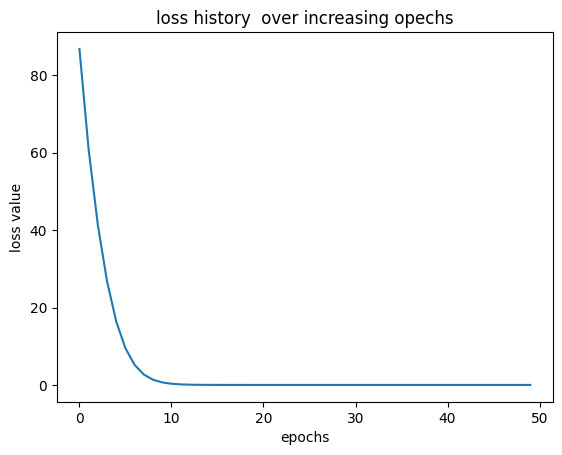

In [ ]:
import torch
import torch.nn as nn
from torchinfo import summary
from torch.optim import SGD
%matplotlib inline
import matplotlib.pyplot as plt

# 定义神经网络
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2, 8)  # input (4,2) * (2,8)==> (4*8)
    self.hidden_layer_activation = nn.ReLU()      # (4*8) => (4*8)
    self.hidden_to_output_layer = nn.Linear(8, 1) # (4*8) * (8,1) ===> (4,1)
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

# 定义输入输出值: 列表的列表
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

# 转换为张量
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
X = X.to(device)
Y = Y.to(device)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


# 模型
mynet = MyNeuralNet().to(device)
# 损失函数: 还可以用CrossEntropyLoss(多项分类), BCELoss(二元分类的二元交叉熵分类)
loss_func = nn.MSELoss()

# 输出模型权重
i = 1
for par in mynet.parameters():
  print(i, par)
  i+=1

_Y = mynet(X)
loss_value = loss_func(_Y, Y)
print(f'loss value: {loss_value}')

# 优化方法
opt = SGD(mynet.parameters(), lr=0.001)

loss_history = []
for _ in range(50):
  opt.zero_grad()
  loss_value = loss_func(mynet(X), Y)
  loss_value.backward()
  opt.step()
  loss_history.append(loss_value.item())
print(f'loss_history: {loss_history}' )

plt.plot(loss_history)
plt.title('loss history  over increasing opechs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## 数据集，数据加载起，批大小

cuda
-----
tensor([[1., 2.],
        [3., 4.]], device='cuda:0') tensor([[3.],
        [7.]], device='cuda:0')
-----
tensor([[7., 8.],
        [5., 6.]], device='cuda:0') tensor([[15.],
        [11.]], device='cuda:0')
0.11603617668151855
tensor([10., 11.], device='cuda:0') ==> tensor([20.7439], device='cuda:0', grad_fn=<ViewBackward0>)
tensor([100., 110.], device='cuda:0') ==> tensor([202.0302], device='cuda:0', grad_fn=<ViewBackward0>)


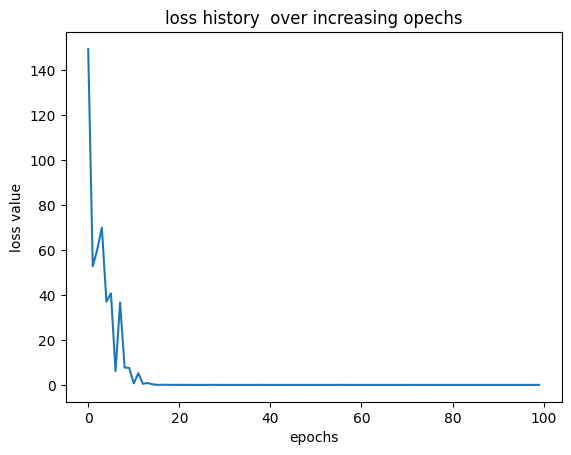

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD
import time
%matplotlib inline
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 倒入数据，转为浮点，注册到设备
x = [ [1,2], [3,4], [5,6], [7,8] ]
y = [ [3], [7], [11], [15] ]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
X = X.to(device)
Y = Y.to(device)

# 数据集
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x.clone().detach()
    self.y = y.clone().detach()

  def __len__(self):
    return len(self.x)

  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]


class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    # 输入维度m*2, 所以wt矩阵必须是2*n1,wt必须是 (n * 2)
    # 输出 (m*n1), 即 m*8
    self.input_to_hidden_layer = nn.Linear(2, 8)
    # activation
    self.hidden_layer_activation = nn.ReLU()
    # 输入 m*8, 所以wt矩阵必须是8*1, wt必须是(1, 8)
    # 输出: m * 1
    self.hidden_to_output_layer = nn.Linear(8, 1)
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

# 创建数据加载起
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

for x, y in dl:
  print("-----")
  print(x, y)


mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
opt = SGD(mynet.parameters(), lr=0.001)

loss_history = []
start = time.time()
for _ in range(50):
  for data in dl:
    x, y = data
    opt.zero_grad()
    loss_value = loss_func(mynet(x), y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
end = time.time()
print(end - start)


plt.plot(loss_history)
plt.title('loss history  over increasing opechs')
plt.xlabel('epochs')
plt.ylabel('loss value')

# 测试模型
val_xs = [ [10,11], [100,110] ]
for val_x in val_xs:
  val_x = torch.tensor(val_x).float().to(device)
  print(f'{val_x} ==> {mynet(val_x)}')




## 使用Sequential构建神经网络

cuda
Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
0.12803101539611816
[[8, 9], [10, 11], [100, 110]] ==> tensor([[ 16.3501],
        [ 19.8974],
        [188.6402]], device='cuda:0', grad_fn=<AddmmBackward0>)


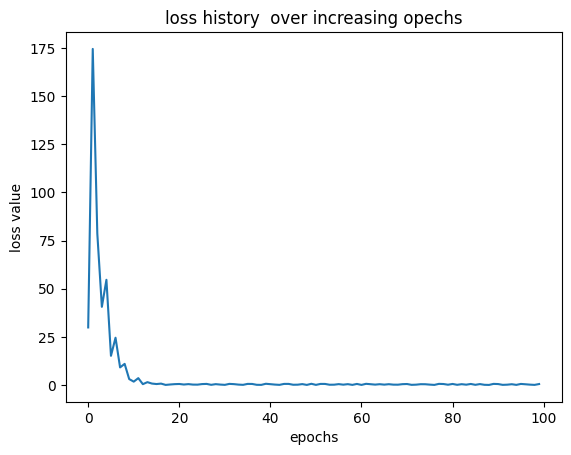

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD
import time
%matplotlib inline
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.optim import SGD
import time

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 导入数据，转为浮点，注册到设备
x = [ [1,2], [3,4], [5,6], [7,8] ]
y = [ [3], [7], [11], [15] ]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
X = X.to(device)
Y = Y.to(device)

# 数据集
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x.clone().detach()
    self.y = y.clone().detach()
  def __len__(self):
    return len(self.x)
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

# 创建数据加载起
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)


# 使用sequential构建网络
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

summary(model, torch.zeros(1,2))

loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr=0.001)

loss_history = []
start =time.time()
for _ in range(50):
  for ix, iy in dl:
    opt.zero_grad()
    loss_value = loss_func(model(ix), iy)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
end = time.time()
print(end - start)

plt.plot(loss_history)
plt.title('loss history  over increasing opechs')
plt.xlabel('epochs')
plt.ylabel('loss value')


# 保存模型
torch.save(model.to(device).state_dict(), 'mymodel.pth')

# 加载模型
model = model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)
state_dict = torch.load('mymodel.pth')
model.load_state_dict(state_dict)
model.to(device)

# 测试模型
val_xs = [ [8,9], [10,11], [100,110] ]
print(f'{val_xs} ==> {model(torch.tensor(val_xs).float().to(device))}')
